# Imports <a id="1"></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data manipulation libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Avoid Warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
print(df.shape)
df.head()

(5110, 12)


id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

**Dropping the *id* column as it's just an identifier**

In [5]:
df.drop(['id'],axis=1,inplace=True)

# Checking for missing data <a id="2"></a>

In [6]:
#count of missing data
missing_values_count = df.isna().sum()

#find the percentage of missing data
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing / total_cells) * 100
print("Percentage of missing data from the dataset is : {}%".format(percent_missing))

Percentage of missing data from the dataset is : 0.35758761786159043%


**Plotting a heatmap to check for missing data features**

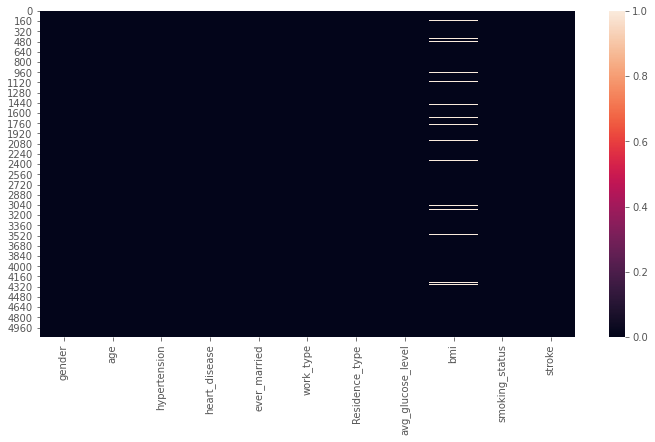

In [7]:
plt.figure(figsize = (12,6))
sns.heatmap(df.isnull())
plt.show()

**Filling the missing data in *bmi* column with mean**

In [6]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Univariate analysis <a id="3"></a>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [8]:
df.to_csv('processed.csv')

**Making different arrays for categorical and continuous features**

In [10]:
cat_cols = ["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status","stroke"]
cont_cols = ["age","avg_glucose_level","bmi"]

### Count Plot of Categorical features <a id="4"></a>

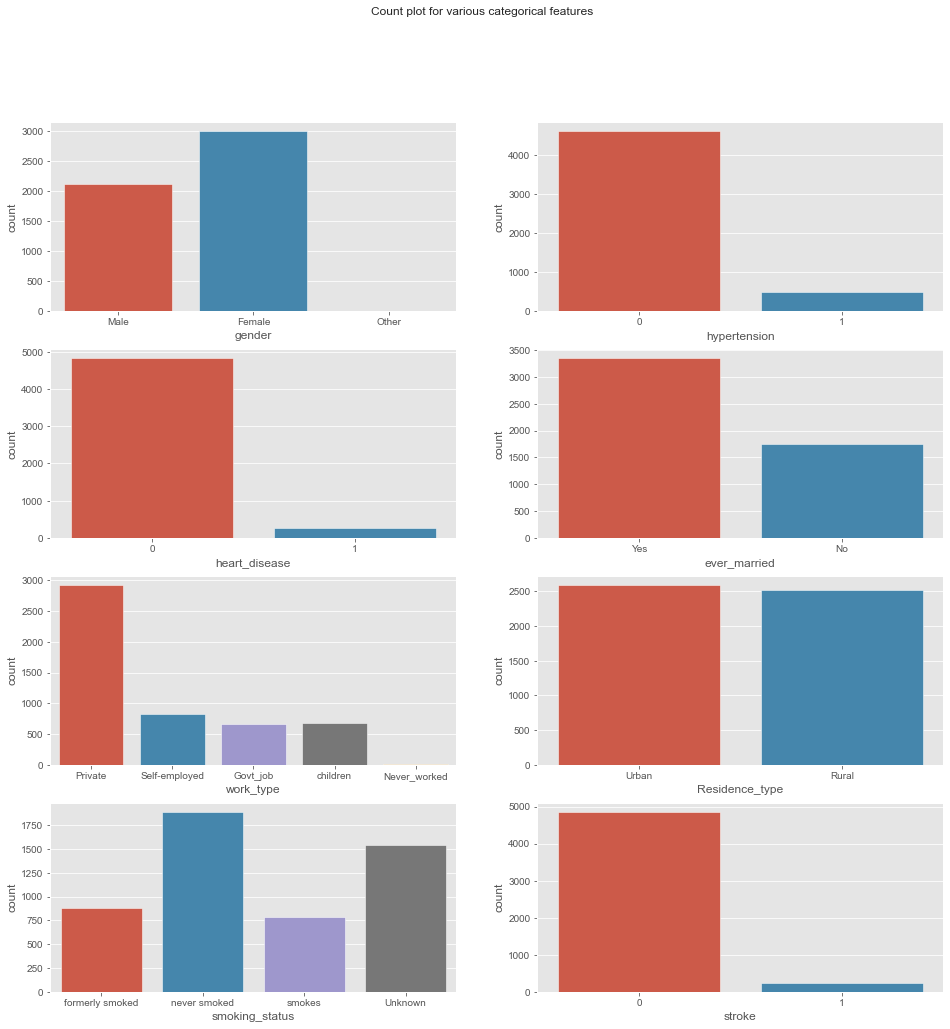

In [11]:
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('darkgrid')
fig.suptitle("Count plot for various categorical features")

sns.countplot(ax=axes[0,0],data=df,x='gender')
sns.countplot(ax=axes[0,1],data=df,x='hypertension')
sns.countplot(ax=axes[1,0],data=df,x='heart_disease')
sns.countplot(ax=axes[1,1],data=df,x='ever_married')
sns.countplot(ax=axes[2,0],data=df,x='work_type')
sns.countplot(ax=axes[2,1],data=df,x='Residence_type')
sns.countplot(ax=axes[3,0],data=df,x='smoking_status')
sns.countplot(ax=axes[3,1],data=df,x='stroke')

plt.show()

### Box Plot of *age* <a id="5"></a>

In [12]:
fig = px.box(data_frame = df,
            x = "age",
            width = 800,
            height = 300)
fig.update_layout({"template":"plotly_dark"})
fig.show()

### Box Plot of *avg_glucose_level* <a id="6"></a>

In [13]:
fig = px.box(data_frame = df,
            x = "avg_glucose_level",
            width = 800,
            height = 300)
fig.update_layout({"template":"plotly_dark"})
fig.show()

### Box Plot of *bmi* <a id="7"></a>

In [14]:
fig = px.box(data_frame = df,
            x = "bmi",
            width = 800,
            height = 300)
fig.update_layout({"template":"plotly_dark"})
fig.show()

### Distribution Plot of *age* <a id="8"></a>

In [15]:
age = list(df['age'].values)

hist_data = [age]
group_labels = ['age']
colors = ['Orange']
fig = ff.create_distplot(hist_data,group_labels,show_hist = True,colors=colors)
fig.update_layout({"template":"plotly_dark"})
fig.show()

### Distribution Plot of *avg_glucose_level* <a id="9"></a>

In [16]:
avg_glucose_level = list(df['avg_glucose_level'].values)
hist_data = [avg_glucose_level]
group_labels = ['avg_glucose_level']
colors = ['Orange']
fig = ff.create_distplot(hist_data,group_labels,show_hist = True,colors=colors)
fig.update_layout({"template":"plotly_dark"})
fig.show()

### Distribution Plot of *bmi* <a id="10"></a>

In [17]:
bmi = list(df['bmi'].values)
hist_data = [bmi]
group_labels = ["bmi"]
colors = ['Orange']
fig = ff.create_distplot(hist_data,group_labels,show_hist = True,colors=colors)
fig.update_layout({"template":"plotly_dark"})
fig.show()

# Bivariate analysis <a id="11"></a>

In [18]:
cat_cols = ["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status","stroke"]
cont_cols = ["age","avg_glucose_level","bmi"]

### Correlation plot of Continuous features <a id="12"></a>

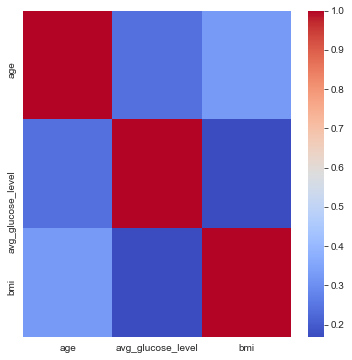

In [19]:
cr = df[cont_cols].corr(method='pearson')
plt.figure(figsize = (6,6))
sns.heatmap(cr,cmap="coolwarm")
plt.show()

### Scatter plot for *age vs avg_glucose_level* with a *Stroke* hue <a id="13"></a>

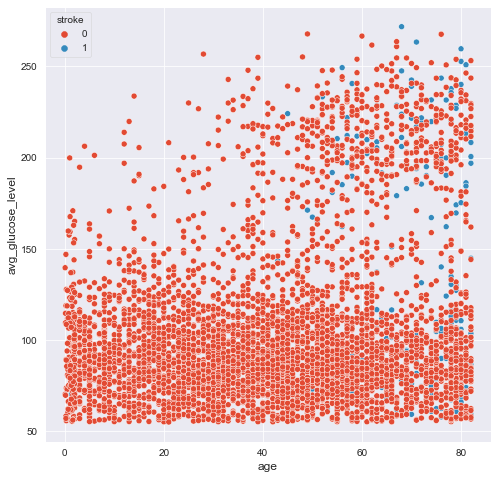

In [20]:
plt.figure(figsize=(8,8))
sns.set_style("darkgrid")
sns.scatterplot(data = df, x = 'age', y = 'avg_glucose_level', hue='stroke')
plt.show()

### Scatter plot for *avg_glucose_level vs bmi* with a *Stroke* hue <a id="14"></a>

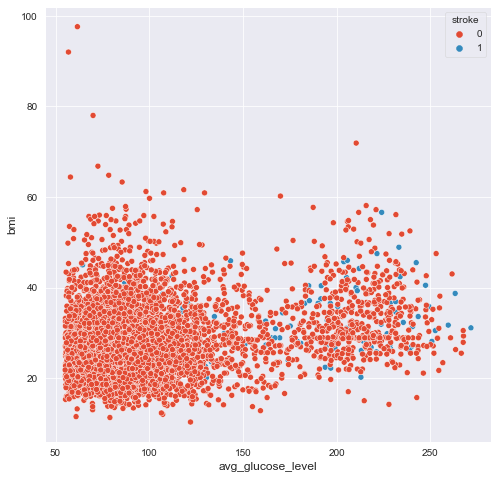

In [21]:
plt.figure(figsize=(8,8))
sns.set_style("darkgrid")
sns.scatterplot(data = df, x = 'avg_glucose_level', y = 'bmi', hue='stroke')
plt.show()

### Scatter plot for *age vs bmi* with a *Stroke* hue <a id="15"></a>

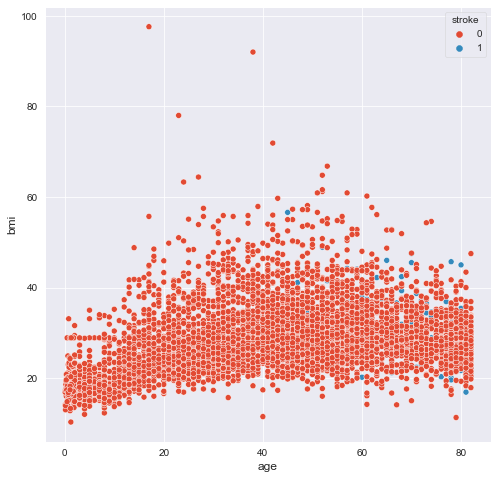

In [22]:
plt.figure(figsize=(8,8))
sns.set_style("darkgrid")
sns.scatterplot(data = df, x = 'age', y = 'bmi', hue='stroke')
plt.show()

### Violin plot for continuous features <a id="16"></a>

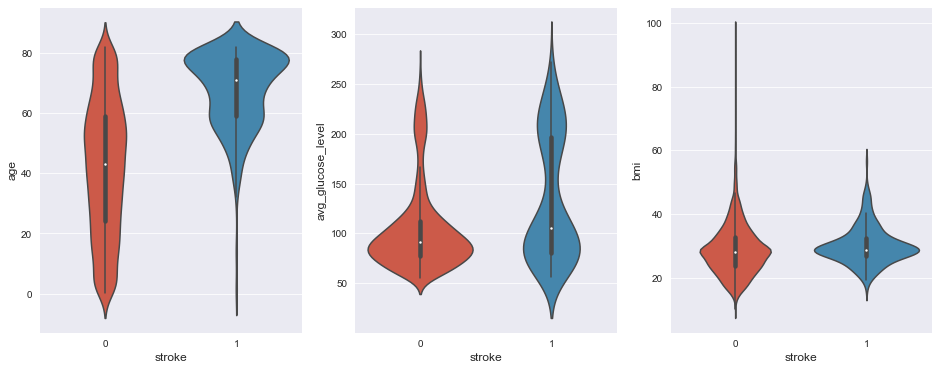

In [23]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.violinplot(x = 'stroke', y = 'age', data = df)
plt.subplot(1,3,2)
sns.violinplot(x = 'stroke', y = 'avg_glucose_level', data = df)
plt.subplot(1,3,3)
sns.violinplot(x = 'stroke', y = 'bmi', data = df)
plt.show()

### Scatter-matrix of the dataset <a id="17"></a>

<Figure size 1152x1152 with 0 Axes>

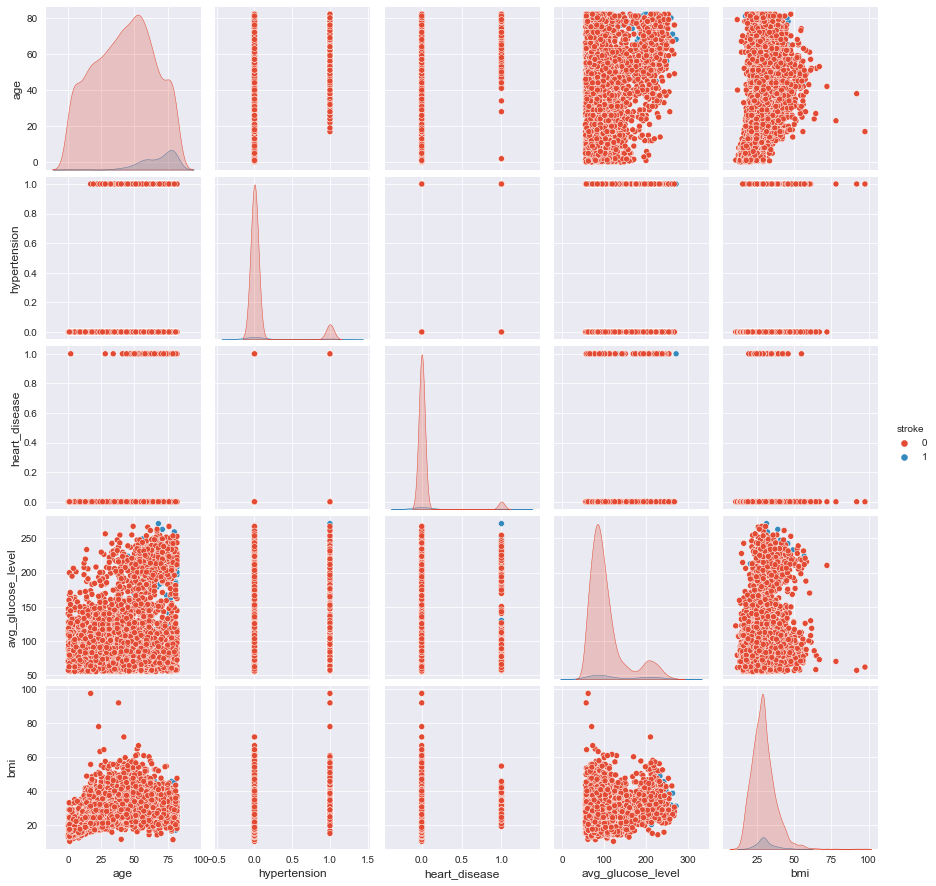

In [24]:
plt.figure(figsize = (16,16))
sns.pairplot(df,hue='stroke')
plt.show()

# Data preprocessing <a id="18"></a>

In [25]:
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [26]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)
df["gender"].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

### Checking the effect of outliers on the reduction of dataset <a id="20"></a>

In [27]:
print("The number of people who don't have stroke : ", df['stroke'].value_counts()[0])
print("The number of people who don't have stroke : ", df['stroke'].value_counts()[1])
cond1 = df['avg_glucose_level'] > 170
cond2 = df['stroke'] == 1
print("The number of outliers in avg_glucose_level with stroke = 1 are : ", df[cond1 & cond2].shape)
cond3 = df['bmi'] > 47
cond4 = df['stroke'] == 1
print("The number of outliers in bmi with stroke = 1 are : ", df[cond3 & cond4].shape)

The number of people who don't have stroke :  4860
The number of people who don't have stroke :  249
The number of outliers in avg_glucose_level with stroke = 1 are :  (83, 11)
The number of outliers in bmi with stroke = 1 are :  (3, 11)


In [28]:
print("The shape before removing the BMI outliers : ",df.shape)
df.drop(df[df['bmi'] > 47].index, inplace = True)
print("The shape after removing the BMI outliers : ",df.shape)

The shape before removing the BMI outliers :  (5109, 11)
The shape after removing the BMI outliers :  (4992, 11)


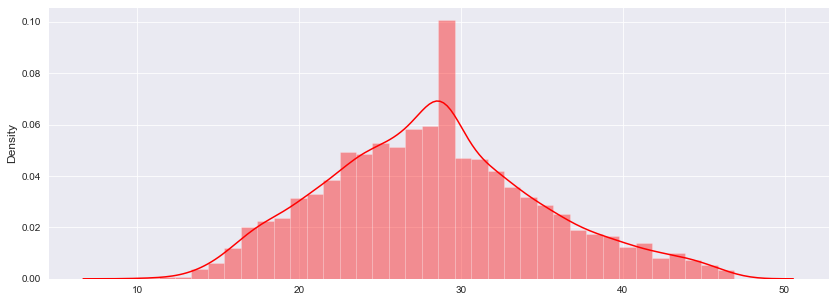

In [29]:
plt.figure(figsize = (14,5))
sns.distplot(x=df['bmi'],color='red')
plt.show()

In [30]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [31]:
# Label Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
object_cols = ["gender","ever_married","work_type","Residence_type","smoking_status"]
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

# SMOTE

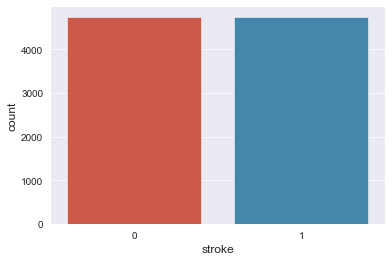

In [32]:
# Using SMOTE
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state = 42)
X = df.drop(['stroke'],axis=1)
y = df[['stroke']]
X,y= sampler.fit_resample(X,y['stroke'].values.ravel())
y = pd.DataFrame({'stroke':y})
sns.countplot(data = y, x = 'stroke', y= None)
plt.show()

In [33]:
# Joining back dataset
df = pd.concat([X,y],axis = 1)
df.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1       1  
1               0             202.21  28.893237               2       1  
2               0             105.92  32.500000               2       1  
3               1             171.23  34.400000               3       1  
4               0             174.12  24.000000               2       1

In [34]:
# shuffling the dataset before model development
df = df.sample(frac = 1)

# Hybrid Deep TL <a id="24"></a>

In [35]:
import torch
import torch.nn as nn

In [36]:
cat_cols = ["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status"]
cont_cols = ["age","avg_glucose_level","bmi"]
y_col = ["stroke"]

In [37]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [38]:
df.dtypes

gender               category
age                   float64
hypertension         category
heart_disease        category
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object

In [39]:
# stacking the categorical columns
cats = np.stack([df[col].cat.codes.values for col in cat_cols], 1)
cats[:5]

array([[0, 0, 0, 1, 3, 0, 2],
       [0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 2, 1, 2],
       [1, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 4, 0, 0]], dtype=int8)

In [40]:
# converting the stack into tensor
cats = torch.tensor(cats, dtype = torch.int64)
cats[:5]

tensor([[0, 0, 0, 1, 3, 0, 2],
        [0, 0, 0, 0, 4, 0, 0],
        [0, 0, 0, 0, 2, 1, 2],
        [1, 0, 0, 0, 4, 0, 0],
        [0, 0, 0, 0, 4, 0, 0]])

In [41]:
# stacking the continuous columns & converting to tensor
conts = np.stack([df[col].values for col in cont_cols], 1)
conts = torch.tensor(conts, dtype=torch.float)
conts[:5]

tensor([[ 78.0000, 109.4700,  30.8000],
        [ 14.0000,  92.2200,  22.8000],
        [ 68.1670,  80.2944,  29.4161],
        [  8.0000, 104.3000,  18.5000],
        [  0.7200,  62.1300,  16.8000]])

In [42]:
# converting target variable to tensor and flattening since CrossEntropyLoss expects a 1-d tensor
y = torch.tensor(df[y_col].values).flatten()
y[:5]

tensor([1, 0, 1, 0, 0])

In [43]:
print(cats.shape)
print(conts.shape)
print(y.shape)

torch.Size([9492, 7])
torch.Size([9492, 3])
torch.Size([9492])


In [44]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(2, 1), (2, 1), (2, 1), (2, 1), (5, 3), (2, 1), (4, 2)]

In [45]:
class HDTL(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [46]:
torch.manual_seed(42)
model = HDTL(emb_szs, conts.shape[1], 2, [400,200,100], p=0.2)
model

HDTL(
  (embeds): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(2, 1)
    (2): Embedding(2, 1)
    (3): Embedding(2, 1)
    (4): Embedding(5, 3)
    (5): Embedding(2, 1)
    (6): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.2, inplace=False)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=13, out_features=400, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=400, out_features=200, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=200, out_features=100, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dro

Bayesian Optimization

In [47]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Performing train/test split <a id="31"></a>

In [48]:
batch_size = 9000
test_size = 492

cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [49]:
print(len(cat_train))
print(len(cat_test))

8508
492


### Training the model <a id="32"></a>

In [50]:
import time
start_time = time.time()

epochs = 320
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') 
print(f'\nDuration: {time.time() - start_time:.0f} seconds') 

epoch:   1  loss: 0.79226971
epoch:  26  loss: 0.39218336
epoch:  51  loss: 0.37174425
epoch:  76  loss: 0.35986394
epoch: 101  loss: 0.34412363
epoch: 126  loss: 0.33559442
epoch: 151  loss: 0.32564360
epoch: 176  loss: 0.31327072
epoch: 201  loss: 0.30764669
epoch: 226  loss: 0.29202586
epoch: 251  loss: 0.28786653
epoch: 276  loss: 0.27623996
epoch: 301  loss: 0.26914999
epoch: 320  loss: 0.25564879

Duration: 22 seconds


### Plotting the loss function <a id="33"></a>

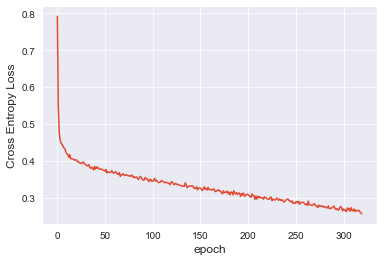

In [51]:
plt.plot(range(epochs), losses)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch');

### Model Validation <a id="34"></a>

In [52]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = criterion(y_val, y_test)
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.32725507


In [53]:
rows = 200
correct = 0
groundTruth = []
predictedValues = []
print(f'{"MODEL OUTPUT":26} ARGMAX  Y_TEST')
for i in range(rows):
    print(f'{str(y_val[i]):26} {y_val[i].argmax():^7}{y_test[i]:^7}')
    predictedValues.append(y_val[i].argmax().item())
    groundTruth.append(y_test[i])
    if y_val[i].argmax().item() == y_test[i]:
        correct += 1
print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')

MODEL OUTPUT               ARGMAX  Y_TEST
tensor([-3.6648,  4.0368])    1      1   
tensor([ 0.5525, -0.1474])    0      1   
tensor([ 1.6007, -1.9164])    0      0   
tensor([ 0.9837, -0.6090])    0      1   
tensor([-0.7187,  1.6396])    1      1   
tensor([-5.2345,  5.8858])    1      1   
tensor([-2.6524,  2.6704])    1      1   
tensor([-1.2360,  1.6339])    1      1   
tensor([-0.4849,  0.4666])    1      0   
tensor([ 5.3401, -4.3897])    0      0   
tensor([-5.2090,  6.0244])    1      1   
tensor([ 4.6090, -5.9303])    0      0   
tensor([-0.1651,  0.5062])    1      0   
tensor([ 4.5006, -4.2582])    0      0   
tensor([ 3.9587, -5.6043])    0      0   
tensor([-2.1463,  1.1674])    1      1   
tensor([ 1.0625, -0.5354])    0      0   
tensor([-1.6575,  1.6055])    1      1   
tensor([ 3.6795, -3.3151])    0      0   
tensor([ 5.2959, -3.9359])    0      0   
tensor([ 0.9864, -0.1980])    0      0   
tensor([-1.5342,  1.1621])    1      1   
tensor([-0.3788,  0.6989])    1   

In [54]:
from sklearn.metrics import f1_score, recall_score,precision_score,accuracy_score
hdtl_f1 = f1_score(groundTruth, predictedValues)
hdtl_rec = recall_score(groundTruth, predictedValues)
hdtl_prec = precision_score(groundTruth, predictedValues)
hdtl_acc = accuracy_score(groundTruth, predictedValues)

In [55]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(groundTruth, predictedValues, pos_label=2)
hdtl_auc = metrics.auc(fpr, tpr)

SGD Optimization

In [56]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [57]:
import time
start_time = time.time()

epochs = 320
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') 
print(f'\nDuration: {time.time() - start_time:.0f} seconds') 

epoch:   1  loss: 0.26735392
epoch:  26  loss: 0.26459032
epoch:  51  loss: 0.26126590
epoch:  76  loss: 0.26178080
epoch: 101  loss: 0.25542626
epoch: 126  loss: 0.25579631
epoch: 151  loss: 0.26520121
epoch: 176  loss: 0.26248160
epoch: 201  loss: 0.26555145
epoch: 226  loss: 0.25964329
epoch: 251  loss: 0.26209179
epoch: 276  loss: 0.26341340
epoch: 301  loss: 0.25709203
epoch: 320  loss: 0.26749557

Duration: 21 seconds


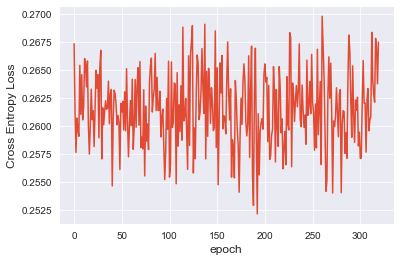

In [58]:
plt.plot(range(epochs), losses)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch');

In [59]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = criterion(y_val, y_test)
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.32895464


In [60]:
rows = 200
correct = 0
groundTruth = []
predictedValues = []
print(f'{"MODEL OUTPUT":26} ARGMAX  Y_TEST')
for i in range(rows):
    print(f'{str(y_val[i]):26} {y_val[i].argmax():^7}{y_test[i]:^7}')
    predictedValues.append(y_val[i].argmax().item())
    groundTruth.append(y_test[i])
    if y_val[i].argmax().item() == y_test[i]:
        correct += 1
print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')

MODEL OUTPUT               ARGMAX  Y_TEST
tensor([-5.0750,  4.9112])    1      1   
tensor([-4.1945,  4.7308])    1      1   
tensor([ 3.1095, -4.1844])    0      0   
tensor([ 0.2272, -1.5439])    0      1   
tensor([-0.3540,  1.1996])    1      1   
tensor([-4.5905,  5.0157])    1      1   
tensor([-7.5779,  8.3397])    1      1   
tensor([-2.1276,  2.5307])    1      1   
tensor([-0.8509,  1.2689])    1      0   
tensor([ 5.2962, -4.2805])    0      0   
tensor([-2.3378,  3.1315])    1      1   
tensor([ 3.2385, -2.9979])    0      0   
tensor([-0.4753,  0.2905])    1      0   
tensor([ 6.8418, -6.1773])    0      0   
tensor([ 5.1587, -8.2113])    0      0   
tensor([-1.8879,  1.7372])    1      1   
tensor([ 1.0371, -0.5777])    0      0   
tensor([-0.5108,  0.7823])    1      1   
tensor([ 4.7327, -2.9755])    0      0   
tensor([ 3.8440, -2.0594])    0      0   
tensor([-0.4240,  1.4826])    1      0   
tensor([-1.1850,  1.1182])    1      1   
tensor([-1.3883,  0.9878])    1   

In [61]:
from sklearn.metrics import f1_score, recall_score,precision_score,accuracy_score
hdtl1_f1 = f1_score(groundTruth, predictedValues)
hdtl1_rec = recall_score(groundTruth, predictedValues)
hdtl1_prec = precision_score(groundTruth, predictedValues)
hdtl1_acc = accuracy_score(groundTruth, predictedValues)

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(groundTruth, predictedValues, pos_label=2)
hdtl1_auc = metrics.auc(fpr, tpr)

For DNN

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import Normalizer
from tensorflow.keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
%matplotlib inline
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [63]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.drop(['id'],axis=1,inplace=True)

In [64]:
df.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1

In [65]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [67]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['gender']= label_encoder.fit_transform(df['gender'])
df['ever_married']= label_encoder.fit_transform(df['ever_married'])
df['work_type']= label_encoder.fit_transform(df['work_type'])
df['Residence_type']= label_encoder.fit_transform(df['Residence_type'])
df['smoking_status']= label_encoder.fit_transform(df['smoking_status'])

df['gender'].unique()
df['ever_married'].unique()
df['work_type'].unique()
df['Residence_type'].unique()
df['smoking_status'].unique()

array([1, 2, 3, 0])

In [68]:
X = df.drop('stroke', axis =1).values
y = df.stroke.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
nl = Normalizer()
nl.fit(X_train)
X_train = nl.transform(X_train)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2)
X_dev = nl.transform(X_dev)
X_test = nl.transform(X_test)

In [69]:
def dnn():
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(128, name='FC1')(inputs)
    layer = BatchNormalization(name='BC1')(layer)
    layer = Activation('relu', name='Activation1')(layer)
    layer = Dropout(0.3, name='Dropout1')(layer)
    layer = Dense(128, name='FC2')(layer)
    layer = BatchNormalization(name='BC2')(layer)
    layer = Activation('relu', name='Activation2')(layer)
    layer = Dropout(0.3, name='Dropout2')(layer)
    layer = Dense(128, name='FC3')(layer)
    layer = BatchNormalization(name='BC3')(layer)
    layer = Dropout(0.3, name='Dropout3')(layer)
    layer = Dense(1, name='OutLayer')(layer)
    layer = Activation('sigmoid', name='sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [70]:
model = dnn()
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 10)]              0         
_________________________________________________________________
FC1 (Dense)                  (None, 128)               1408      
_________________________________________________________________
BC1 (BatchNormalization)     (None, 128)               512       
_________________________________________________________________
Activation1 (Activation)     (None, 128)               0         
_________________________________________________________________
Dropout1 (Dropout)           (None, 128)               0         
_________________________________________________________________
FC2 (Dense)                  (None, 128)               16512     
_________________________________________________________________
BC2 (BatchNormalization)     (None, 128)              

Bayesian Optimization

In [71]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [72]:
reduce_lr = ReduceLROnPlateau()
early_stopping = EarlyStopping(patience=20, min_delta=0.0001)

In [73]:
model.fit(x=X_train, y=y_train, epochs=200, validation_data=(X_dev, y_dev), callbacks=[reduce_lr, early_stopping], verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

In [74]:
x_lst = [X_train, X_dev, X_test]
y_lst = [y_train, y_dev, y_test]
for i,(x,y) in enumerate(zip(x_lst, y_lst)):
    y_pred = model.predict(x)
    y_pred = np.around(y_pred)
    y_pred = np.asarray(y_pred)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [75]:
dnn_acc = accuracy_score(y, y_pred)

In [76]:
dnn_f1 = f1_score(y, y_pred)
dnn_rec = recall_score(y, y_pred)
dnn_prec = precision_score(y, y_pred)

fpr, tpr, thresholds = metrics.roc_curve(y, y_pred, pos_label=2)
dnn_auc = metrics.auc(fpr, tpr)

# For CNN + LSTM

In [77]:
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
from sklearn.metrics import log_loss
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

In [78]:
X = df.drop('stroke', axis =1)
y = df.stroke
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [79]:
X_train = X_train.values
X_test = X_test.values

X_train = X_train.reshape(-1, X_train.shape[1],1)
X_test = X_test.reshape(-1, X_test.shape[1],1)

In [80]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [81]:
def showResults(test, pred):
    #target_names = ['positive', 'negative']
    # print(classification_report(test, pred, target_names=target_names))
    accuracy = accuracy_score(test, pred)
    precision=precision_score(test, pred, average='weighted')
    f1Score=f1_score(test, pred, average='weighted') 
    #loss=log_loss(test,pred)
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    #print("Loss : {}".format(loss))
    cm=confusion_matrix(test, pred)
    print(cm)

SGD Optimization

In [82]:
import tensorflow as tf
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=1,padding="causal",activation="relu",input_shape=(X_train.shape[1],X_train.shape[2])),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2)
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(5e-4,
                                                             decay_steps=1000000,
                                                             decay_rate=0.98,
                                                             staircase=False)

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 10, 64)            384       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 9, 64)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 9, 32)             6176      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 32)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 8, 128)            82432     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [83]:
history = model.fit(X_train, Y_train,epochs=100,steps_per_epoch=200,validation_steps=200)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
200/200 [==============================] - 1s 3ms/step - loss: 0.1836 - acc: 0.9485
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.0548 - acc: 0.9513
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.0526 - acc: 0.9510
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.0513 - acc: 0

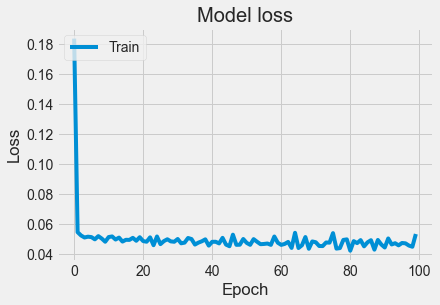

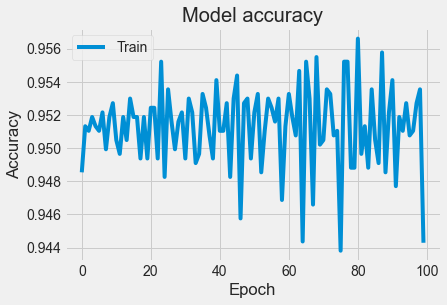

In [84]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

In [85]:
predictions = model.predict(X_test, verbose=1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
48/48 [==============================] - 0s 2ms/step


In [86]:
predictcv=np.argmax(predictions,axis=1)
actual_valuecv=np.argmax(Y_test,axis=1)

In [87]:
ens_acc = accuracy_score(actual_valuecv, predictcv)
ens_f1 = f1_score(actual_valuecv, predictcv)
ens_rec = recall_score(actual_valuecv, predictcv)
ens_prec = precision_score(actual_valuecv, predictcv)

fpr, tpr, thresholds = metrics.roc_curve(actual_valuecv, predictcv, pos_label=2)
ens_auc = metrics.auc(fpr, tpr)

# For Machine Learning

In [4]:
df = pd.read_csv('processed.csv')
df.head()

Unnamed: 0  gender   age  hypertension  heart_disease ever_married  \
0           0    Male  67.0             0              1          Yes   
1           1  Female  61.0             0              0          Yes   
2           2    Male  80.0             0              1          Yes   
3           3  Female  49.0             0              0          Yes   
4           4  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  28.893237   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke  
0  formerly smoked       1  
1     never smoked       1  
2     never smoked       1  
3           smokes       1  
4     never smoked       1

In [5]:
del df['Unnamed: 0']

In [6]:
df.shape

(5110, 11)

In [7]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [12]:
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['gender']= label_encoder.fit_transform(df['gender'])
df['ever_married']= label_encoder.fit_transform(df['ever_married'])
df['work_type']= label_encoder.fit_transform(df['work_type'])
df['Residence_type']= label_encoder.fit_transform(df['Residence_type'])
df['smoking_status']= label_encoder.fit_transform(df['smoking_status'])
  
df['gender'].unique()
df['ever_married'].unique()
df['work_type'].unique()
df['Residence_type'].unique()
df['smoking_status'].unique()

array([1, 2, 3, 0])

In [13]:
X = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']]
y = df['stroke']

In [14]:
X

gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          2   
1          0  61.0             0              0             1          3   
2          1  80.0             0              1             1          2   
3          0  49.0             0              0             1          2   
4          0  79.0             1              0             1          3   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1          2   
5106       0  81.0             0              0             1          3   
5107       0  35.0             0              0             1          3   
5108       1  51.0             0              0             1          2   
5109       0  44.0             0              0             1          0   

      Residence_type  avg_glucose_level        bmi  smoking_status  
0                  1             228.69  36.600000               1  
1                  0             202.21  28.893237               2  
2                  0             105.92  32.500000               2  
3                  1             171.23  34.400000               3  
4                  0             174.12  24.000000               2  
...              ...                ...        ...             ...  
5105               1              83.75  28.893237               2  
5106               1             125.20  40.000000               2  
5107               0              82.99  30.600000               2  
5108               0             166.29  25.600000               1  
5109               1              85.28  26.200000               0  

[5110 rows x 10 columns]

In [15]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

# Support Vector Machine

In [90]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
SVM = SVC()
SVM.fit(X, y)
predictions = SVM.predict(X)
val1 = (accuracy_score(y, predictions)*100)
print("*Accuracy score for SVM: ", val1, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y, predictions))
print("*Classification Report for SVM: ")
print(classification_report(y, predictions))

*Accuracy score for SVM:  95.12720156555773 

*Confusion Matrix for SVM: 
[[4861    0]
 [ 249    0]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4861
           1       0.00      0.00      0.00       249

    accuracy                           0.95      5110
   macro avg       0.48      0.50      0.49      5110
weighted avg       0.90      0.95      0.93      5110



In [91]:
svm_f1 = f1_score(y, predictions)
svm_rec = recall_score(y, predictions)
svm_prec = precision_score(y, predictions)

fpr, tpr, thresholds = metrics.roc_curve(y, predictions, pos_label=2)
svm_auc = metrics.auc(fpr, tpr)

# Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth =3, random_state = 42)
DT.fit(X, y)
predictions = DT.predict(X)
val2 = (accuracy_score(y, predictions)*100)
print("*Accuracy score for DT: ", val2, "\n")
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y, predictions))
print("*Classification Report for DT: ")
print(classification_report(y, predictions))

*Accuracy score for DT:  95.14677103718199 

*Confusion Matrix for DT: 
[[4858    3]
 [ 245    4]]
*Classification Report for DT: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4861
           1       0.57      0.02      0.03       249

    accuracy                           0.95      5110
   macro avg       0.76      0.51      0.50      5110
weighted avg       0.93      0.95      0.93      5110



In [93]:
dt_f1 = f1_score(y, predictions)
dt_rec = recall_score(y, predictions)
dt_prec = precision_score(y, predictions)

fpr, tpr, thresholds = metrics.roc_curve(y, predictions, pos_label=2)
dt_auc = metrics.auc(fpr, tpr)

# Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X, y)
predictions = RF.predict(X)
val3 = (accuracy_score(y, predictions)*100)
print("*Accuracy score for RF: ", val3, "\n")
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y, predictions))
print("*Classification Report for RF: ")
print(classification_report(y, predictions))

*Accuracy score for RF:  100.0 

*Confusion Matrix for RF: 
[[4861    0]
 [   0  249]]
*Classification Report for RF: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4861
           1       1.00      1.00      1.00       249

    accuracy                           1.00      5110
   macro avg       1.00      1.00      1.00      5110
weighted avg       1.00      1.00      1.00      5110



In [95]:
rf_f1 = f1_score(y, predictions)
rf_rec = recall_score(y, predictions)
rf_prec = precision_score(y, predictions)

fpr, tpr, thresholds = metrics.roc_curve(y, predictions, pos_label=2)
rf_auc = metrics.auc(fpr, tpr)

# Ensemble Method

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix
clf1 = GaussianNB()
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('nb', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')
eclf1.fit(X, y)
predictions = eclf1.predict(X)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y, predictions))

*Confusion Matrix for Voting Classifier: 
[[4861    0]
 [   4  245]]


In [18]:
from sklearn.metrics import accuracy_score, classification_report
val4 = (accuracy_score(y, predictions)*100)
print("*Accuracy score for Voting: ", val4, "\n")
print("*Classification Report for Voting: ")
print(classification_report(y, predictions))

*Accuracy score for Voting:  99.92172211350294 

*Classification Report for Voting: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4861
           1       1.00      0.98      0.99       249

    accuracy                           1.00      5110
   macro avg       1.00      0.99      1.00      5110
weighted avg       1.00      1.00      1.00      5110



In [98]:
vot_f1 = f1_score(y, predictions)
vot_rec = recall_score(y, predictions)
vot_prec = precision_score(y, predictions)

fpr, tpr, thresholds = metrics.roc_curve(y, predictions, pos_label=2)
vot_auc = metrics.auc(fpr, tpr)

# Comparison

In [99]:
score = [val1,val2,val3,val4,ens_acc*100,dnn_acc*100,hdtl_acc*100,hdtl1_acc*100]

In [100]:
#make variabel for save the result and to show it
classifier = ('SVM','DT','RF','Voting','CNN+LSTM-RO','DNN-BO','HDTL-BO','HDTL-RO')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4 5 6 7]
[95.12720156555773, 95.14677103718199, 100.0, 99.92172211350294, 95.10763209393346, 95.30638852672752, 84.5, 83.0]


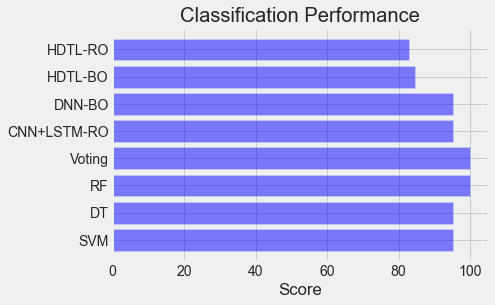

In [101]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

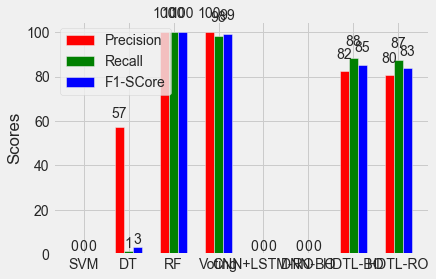

In [102]:
N = 8
ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [svm_prec*100,dt_prec*100,rf_prec*100,vot_prec*100,ens_prec*100,dnn_prec*100,hdtl_prec*100,hdtl1_prec*100]

rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [svm_rec*100,dt_rec*100,rf_rec*100,vot_rec*100,ens_rec*100,dnn_rec*100,hdtl_rec*100,hdtl1_rec*100]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [svm_f1*100,dt_f1*100,rf_f1*100,vot_f1*100,ens_f1*100,dnn_f1*100,hdtl_f1*100,hdtl1_f1*100]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('SVM','DT','RF','Voting','CNN+LSTM-RO','DNN-BO','HDTL-BO','HDTL-RO') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Precision', 'Recall', 'F1-SCore') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

In [19]:
import joblib
filename = 'model.sav'
joblib.dump(eclf1, filename)

['model.sav']